In this module, we study how to implement the KNN algorithm for binary response in Python. KNN is a type of instance-based learning, or lazing learning where the function is only approximated locally and all computation is deferred until classification.

The dataset we will be using is from some classified data, all continuous variables but the meaning of the variables are unknown. For simplicity, we will ignore the cases when data types are of mixed data types. Our final goal is classification, and we will use the KNN algorithm to achieve this. This type of problems are often encountered during interviews when candidates are not given any information about the dataset, so they cannot use intuition to build a traditional type of model. KNN comes into play as the algorithm simply employs the notion of distance among data points. 

KNN certainly has some advantages and disadvantages. One of the biggest of KNN is the curse of dimensionality due to its nature of being nonparametric. KNN is not suitable for high-dimensional large data as it tends to overfit and have more prediction powers. Nevertheless, KNN is one of the most popular off-the-shelve type of models that machine learning experts love when it comes to datasets that are data scientists are not familiar with in the first place. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
path='C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\\PYTHON\\Open Courses on Python\\Udemy Course on Python\\Introduction to Data Science Using Python\\datasets'
os.chdir(path)
df = pd.read_csv("Classified Data",index_col=0) # settting index_col=0 to use the first column as the index.
df.head() 

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


Standardization of a dataset is a common requirement for many machine learning estimators: the prediction result might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features accurately as expected. This is usually a problem for methods like KNN because the algorithm requires calculation of distance, and large scales may skew the results easily when it comes to distance. 

Basically, because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables can matter (this is also why KNN classifier is very sensitive to outliers and noisy axes). Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale. Below, the StadardScaler() function does the amazing job of standardization. But keep in mind that standardization does not resolve the curse of dimensionality problem:

In [3]:
scaler = StandardScaler() # this is an instance
scaler.fit(df.drop('TARGET CLASS',axis=1)) # only fitting the feature columns without the response column 
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1)) 
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1]) # everything but the last column
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


Now let's do the train-test split for our machine learning task:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

Now let's use KNN to train the model. Remember that we are trying to come up with a model to predict whether someone will be labeled as 'TARGET CLASS' or not. We'll start with k=1, and then find the optimal k. 

In [5]:
k=1
KNN= KNeighborsClassifier(n_neighbors=k, weights='uniform') # default is uniform
KNN.fit(X_train,y_train)
pred = KNN.predict(X_test)

Now let's do model evaluation:

In [6]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.91      0.93      0.92       154
          1       0.92      0.90      0.91       146

avg / total       0.91      0.91      0.91       300



Finally, let's pick the optimal value for the hyperparameter k. To do so, we specify a grid of k values and pick the model that gives us the best performance. 

In [7]:
error_rate = []
klist=list(range(1, 40)) # creating a list of k-values from 1 to 40 (41-1)
for k in range(1,40):   
    KNN = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    KNN.fit(X_train,y_train)
    pred_k = KNN.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test)) # average error rate
error_rate2 = pd.Series((v for v in error_rate)).tolist()
labels=['k', 'Average Error Rate']
print('Below gives us a snapshot of the error rate display:')
report=pd.DataFrame({'k': klist, 'Average Error Rate': error_rate2})
report.head()

Below gives us a snapshot of the error rate display:


,Average Error Rate,k
0,0.086667,1
1,0.100000,2
2,0.073333,3
3,0.066667,4
4,0.090000,5


Text(0,0.5,'Error Rate')

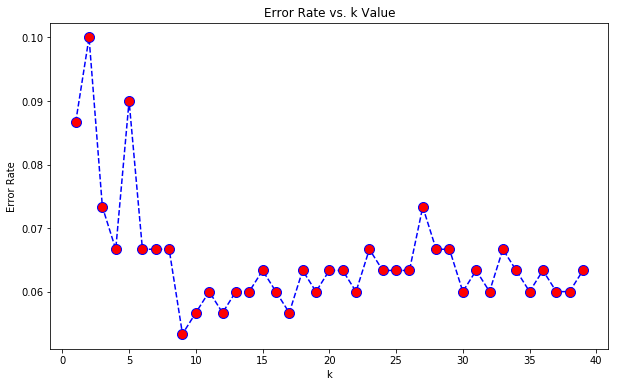

In [8]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')

In [9]:
kindex=report.loc[report['Average Error Rate'].idxmin()]
k_star=int(kindex['k'])
print('Optimal k value in the KNN algorithm is given by', k_star, '.\n')
k=k_star
KNN= KNeighborsClassifier(n_neighbors=k_star)
KNN.fit(X_train,y_train)
pred = KNN.predict(X_test)
print(classification_report(y_test,pred))

Optimal k value in the KNN algorithm is given by 9 .

             precision    recall  f1-score   support

          0       0.95      0.94      0.95       154
          1       0.94      0.95      0.95       146

avg / total       0.95      0.95      0.95       300



Additional Resources:

  - http://courses.cs.tamu.edu/rgutier/cs790_w02/l8.pdf
  - http://www.stat.cmu.edu/~ryantibs/statml/lectures/nonpar.pdf
  - http://web.stanford.edu/class/ee378a/books/book1.pdf
  - http://web.stanford.edu/class/ee378a/books/book2.pdf